In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('day.csv')

# Data Quality Checks
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

# Check data types
data_types = data.dtypes
print("Data Types:\n", data_types)

# Convert 'dteday' to datetime format
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y', dayfirst=True)

# Convert numerical categorical features to strings
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow/rain', 4: 'heavy_rain/snow'})
data['yr'] = data['yr'].map({0: '2018', 1: '2019'})

# Create dummy variables for categorical features
data = pd.get_dummies(data, columns=['season', 'weathersit', 'yr', 'holiday', 'weekday', 'workingday'], drop_first=True)

# Extract year, month, and day from 'dteday'
data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month
data['day'] = data['dteday'].dt.day

# Verify the dummy variables created
print("Columns after get_dummies:\n", data.columns)

# Define the features list based on the actual dummy variables created
features = [
    'temp', 'atemp', 'hum', 'windspeed', 'month', 'day'
]
# Append only existing dummy variables to the feature list
dummy_vars = [
    'season_spring', 'season_summer', 'season_fall', 
    'weathersit_clear', 'weathersit_mist', 
    'yr_2019', 
    'holiday_1', 
    'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 
    'workingday_1'
]

for var in dummy_vars:
    if var in data.columns:
        features.append(var)

print("Selected Features:\n", features)

# Target Variable
target = 'cnt'

# Extract features and target variable
X = data[features]
y = data[target]

# Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Missing Values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate Rows: 0
Data Types:
 instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
Columns after get_dummies:
 Index(['instant', 'dteday', 'mnth', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_light_snow/rain', 'weathersit_mist',
       'yr_2019', 'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3',
 

<Axes: >

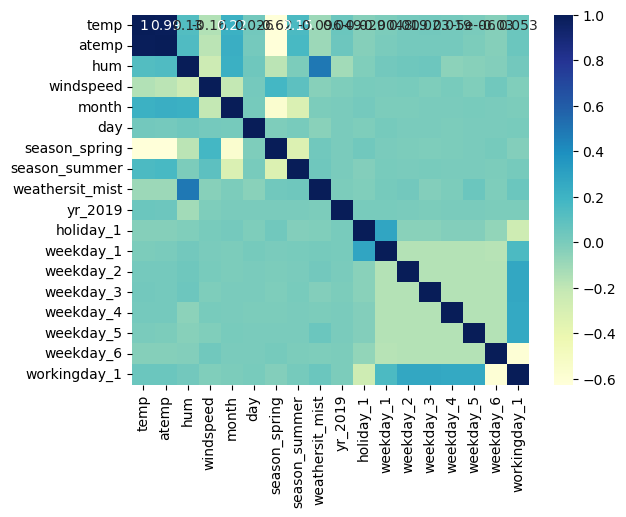

In [3]:
plt.figure(figure=(16,10))
sns.heatmap(X_scaled.corr(), annot = True, cmap='YlGnBu')

In [4]:
# Statsmodels Linear Regression
X_train_sm = sm.add_constant(X_train['temp'])  # adding a constant
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     381.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.04e-65
Time:                        22:00:47   Log-Likelihood:                -5106.6
No. Observations:                 584   AIC:                         1.022e+04
Df Residuals:                     582   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1561.0095    165.301      9.443      0.0

In [5]:
# Statsmodels Linear Regression
X_train_sm = sm.add_constant(X_train[['temp', 'yr_2019']])  # adding a constant
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     590.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.17e-140
Time:                        22:00:47   Log-Likelihood:                -4929.9
No. Observations:                 584   AIC:                             9866.
Df Residuals:                     581   BIC:                             9879.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        640.0642    129.234      4.953      0.0

In [6]:
# Statsmodels Linear Regression
X_train_sm = sm.add_constant(X_train[['temp', 'yr_2019', 'atemp']])  # adding a constant
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     418.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.44e-144
Time:                        22:00:47   Log-Likelihood:                -4917.5
No. Observations:                 584   AIC:                             9843.
Df Residuals:                     580   BIC:                             9861.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        472.7631    130.940      3.611      0.0

In [7]:
# Statsmodels Linear Regression
X_train_sm = sm.add_constant(X_train[['temp', 'yr_2019', 'atemp', 'hum']])  # adding a constant
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     342.8
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.20e-151
Time:                        22:00:47   Log-Likelihood:                -4899.2
No. Observations:                 584   AIC:                             9808.
Df Residuals:                     579   BIC:                             9830.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1631.6911    227.889      7.160      0.0

In [8]:
# Statsmodels Linear Regression
X_train_sm = sm.add_constant(X_train[['temp', 'yr_2019', 'atemp', 'hum', 'season_spring']])  # adding a constant
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     366.2
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.71e-176
Time:                        22:00:48   Log-Likelihood:                -4837.0
No. Observations:                 584   AIC:                             9686.
Df Residuals:                     578   BIC:                             9712.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3127.0970    241.534     12.947

In [9]:
# Statsmodels Linear Regression
X_train_sm = sm.add_constant(X_train[['temp', 'yr_2019', 'atemp', 'hum', 'season_spring', 'windspeed']])  # adding a constant
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     338.6
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.30e-185
Time:                        22:00:48   Log-Likelihood:                -4813.2
No. Observations:                 584   AIC:                             9640.
Df Residuals:                     577   BIC:                             9671.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4153.6172    274.611     15.125

In [10]:
# Statsmodels Linear Regression
X_train_sm = sm.add_constant(X_train[['temp', 'yr_2019', 'atemp', 'hum', 'season_spring', 'windspeed']])  # adding a constant
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     338.6
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          2.30e-185
Time:                        22:00:48   Log-Likelihood:                -4813.2
No. Observations:                 584   AIC:                             9640.
Df Residuals:                     577   BIC:                             9671.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4153.6172    274.611     15.125

In [11]:
# Calculate VIF for each feature
X_train_vif = X_train.copy()
X_train_vif = sm.add_constant(X_train_vif)  # adding a constant
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
print("VIF Data:\n", vif_data)

VIF Data:
             feature         VIF
0             const   87.263595
1              temp  170.320263
2             atemp  173.382079
3               hum    1.566842
4         windspeed    1.217279
5             month    3.255544
6               day    1.018498
7     season_spring    4.651012
8     season_summer    2.220418
9   weathersit_mist    1.399892
10          yr_2019    1.033809
11        holiday_1         inf
12        weekday_1         inf
13        weekday_2         inf
14        weekday_3         inf
15        weekday_4         inf
16        weekday_5         inf
17        weekday_6    1.675617
18     workingday_1         inf


In [12]:
# Calculate VIF for each feature
X_train_vif = X_train[['temp', 'atemp', 'hum', 'windspeed', 'month', 'day', 'season_spring', 'season_summer', 'weathersit_mist', 'yr_2019', 'weekday_6']]
X_train_vif = sm.add_constant(X_train_vif)  # adding a constant
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
print("VIF Data:\n", vif_data)

VIF Data:
             feature         VIF
0             const   80.917030
1              temp  167.513583
2             atemp  170.468028
3               hum    1.529664
4         windspeed    1.208732
5             month    3.234589
6               day    1.014688
7     season_spring    4.624167
8     season_summer    2.217199
9   weathersit_mist    1.387856
10          yr_2019    1.031707
11        weekday_6    1.004104


In [13]:
# Calculate VIF for each feature
X_train_vif = X_train[[ 'temp', 'hum', 'windspeed', 'month', 'day', 'season_spring', 'season_summer', 'weathersit_mist', 'yr_2019', 'weekday_6']]
X_train_vif = sm.add_constant(X_train_vif)  # adding a constant
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
print("VIF Data:\n", vif_data)

VIF Data:
             feature        VIF
0             const  79.548990
1              temp   1.974376
2               hum   1.516428
3         windspeed   1.107209
4             month   3.214367
5               day   1.008719
6     season_spring   4.623786
7     season_summer   2.181522
8   weathersit_mist   1.382513
9           yr_2019   1.029713
10        weekday_6   1.003701


In [14]:
# Statsmodels Linear Regression
X_train_sm = sm.add_constant(X_train[[ 'temp', 'hum', 'windspeed', 'season_spring', 'yr_2019']])  # adding a constant
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     399.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.70e-185
Time:                        22:00:48   Log-Likelihood:                -4817.4
No. Observations:                 584   AIC:                             9647.
Df Residuals:                     578   BIC:                             9673.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4334.4901    269.032     16.111

In [15]:
# Calculate VIF for each feature
X_train_vif = X_train[[ 'temp', 'hum', 'windspeed', 'season_spring', 'yr_2019']]
X_train_vif = sm.add_constant(X_train_vif)  # adding a constant
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
print("VIF Data:\n", vif_data)

VIF Data:
          feature        VIF
0          const  48.868143
1           temp   1.684040
2            hum   1.077961
3      windspeed   1.068215
4  season_spring   1.683791
5        yr_2019   1.016365


In [16]:
y_train_predict = model.predict(X_train_sm)
y_train_predict

247    4085.888589
335    3484.937538
702    5567.590105
440    4414.826483
136    3221.599463
          ...     
71     1762.017151
106    3572.814852
270    4055.553725
435    4469.418599
102    2761.933567
Length: 584, dtype: float64

<Axes: ylabel='Density'>

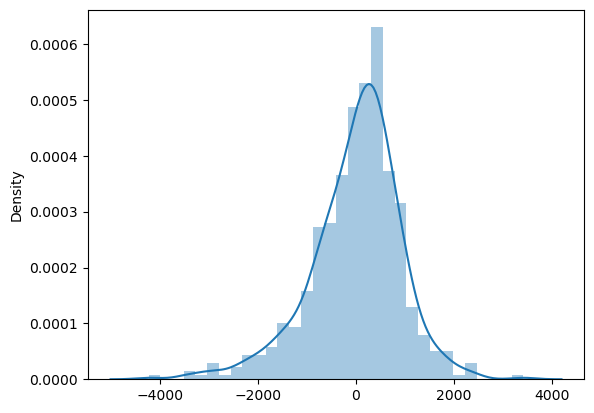

In [17]:
res = y_train - y_train_predict
sns.distplot(res)

In [18]:
X_train_sm.describe()

,const,temp,hum,windspeed,season_spring,yr_2019
count,584.0,584.000000,584.000000,584.000000,584.000000,584.000000
mean,1.0,0.551484,0.652750,0.338010,0.229452,0.511986
std,0.0,0.227249,0.146330,0.154364,0.420841,0.500285
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.354266,0.541583,0.227878,0.000000,0.000000
50%,1.0,0.566998,0.656170,0.312824,0.000000,1.000000
75%,1.0,0.745598,0.755724,0.429484,0.000000,1.000000
max,1.0,1.000000,0.997858,0.824380,1.000000,1.000000


In [19]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[[ 'const', 'temp', 'hum', 'windspeed', 'season_spring', 'yr_2019']]

In [20]:
y_test_predict = model.predict(X_test_sm)
y_test_predict

468    6156.151152
148    3984.881895
302    3183.755277
355    2308.884537
515    6934.180161
          ...     
404    3503.681771
390    3821.632126
218    4517.148679
135    4062.699536
260    3781.938209
Length: 146, dtype: float64

<Axes: ylabel='Density'>

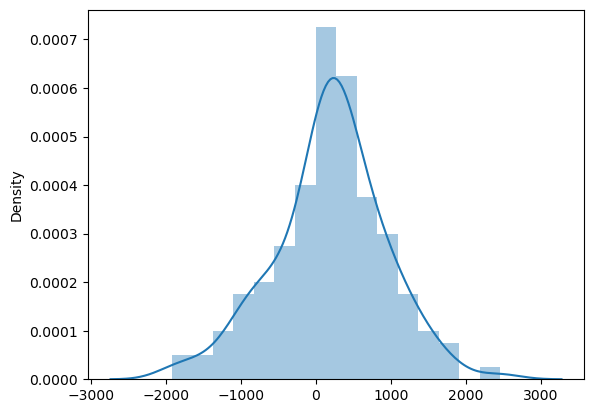

In [21]:
res = y_test - y_test_predict
sns.distplot(res)

In [22]:
r2_score(y_true=y_test, y_pred=y_test_predict)

0.8310896365937871